#Loading dataset

Load the dataset from the following link using pandas into a dataframe:

https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data


In [ ]:
import requests
import pandas as pd
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB as Naive_Bayes
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score


from IPython.display import display

In [ ]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [ ]:
print('Number of Features In Dataset :', df.shape[1])
print('Number of Instances In Dataset : ', df.shape[0])

Number of Features In Dataset : 24
Number of Instances In Dataset :  195


#Cleaning dataset

We can see that the loaded dataset has 24 features and 195 records. Now we need to clean the dataset and remove the redundant features. The feature "Name" is redundant feature and thus can be removed.

In [ ]:
# Dropping The Name Column
df.drop(['name'], axis=1, inplace=True)
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
print(df.status)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


The status feature just contains zeros and ones and does not require to be a signed int64. Thus we can reduce the space by changing it's type to uint8. 

In [ ]:
print("Before changing type: ")
df.info()
df['status'] = df['status'].astype('uint8')
print("After changing type: ")
df.info()

Before changing type: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195

Check if there are any duplicate records in the dataset thus reducing the redundancy and helping in creating somewhat unbiased model later.

In [ ]:
# Checking For Duplicate Rows In Dataset
print('Number of Duplicated Rows :',df.duplicated().sum())

# Checking For Missing Values In Dataset
df.isna().sum()

Number of Duplicated Rows : 0


MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

As we can see that there are no duplicate columns in the dataset. Thus, now moving on to creating a balanced dataset.

#Balancing the dataset

Let's check the count of records available for each value of the variable to be predicted i.e. for status = 0 and for status = 1.

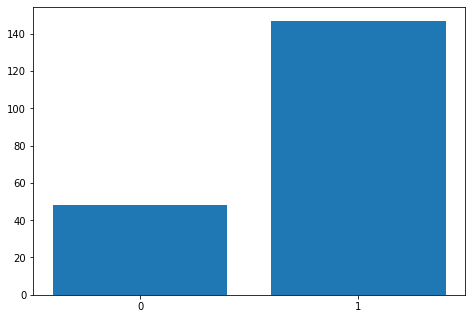


Count of different status values: 
1    147
0     48
Name: status, dtype: int64


In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
status = ['0', '1']
count = [len(df.status) - sum(df.status), sum(df.status)]
ax.bar(status, count)

plt.show()
print("\nCount of different status values: ")
print(df['status'].value_counts())

Split the features and target variables.

In [ ]:
# Extracting Features Into Features & Target
X = df.drop(['status'], axis=1)
y = df['status']

print('Feature (X) Shape Before Balancing :', X.shape)
print('Target (y) Shape Before Balancing :', y.shape)

Feature (X) Shape Before Balancing : (195, 22)
Target (y) Shape Before Balancing : (195,)


Balance the number of the rows for each type of the target variable values using SMOTE.

In [ ]:

from imblearn.over_sampling import SMOTE

# Intialising SMOTE Object
sm = SMOTE(random_state=300)

# Resampling Data
X, y = sm.fit_resample(X, y)

print('Feature (X) Shape After Balancing :', X.shape)
print('Target (y) Shape After Balancing :', y.shape)

Feature (X) Shape After Balancing : (294, 22)
Target (y) Shape After Balancing : (294,)


Normalise all the values of the feature columns and the target variable (the target variable is already normalized i.e. all values are between -1 and 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scaling features between -1 and 1  for normalization 
scaler = MinMaxScaler((-1,1))

# define X_features , Y_labels
X_features = scaler.fit_transform(X)
Y_labels = y


# Split the dataset and building a model

Split the dataset into 20% test size and 80% train size. And then build Logistic regression model.

Here we can use model.predict to predict the target variable. But it has a threshold of 0.5 probability. We can even use model.predict_proba which returns the probability and we can set threshold to what we want.

In [ ]:
from sklearn.model_selection import train_test_split

# Split training and test set
X_train,X_test,y_train,y_test = train_test_split(X_features,Y_labels, test_size=0.2)

# Logistic Regression

In [ ]:
from sklearn.metrics import precision_score
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(precision_score(y_test, y_pred))

y_pred1 = model.predict_proba(X_test)[:,1] > 0.75
print(precision_score(y_test,y_pred1))

0.7941176470588235
1.0


We can find the area under the curve (AUC) using the function roc_auc_score. The greater the AUC the better the model.

AUC score: 0.9114219114219114


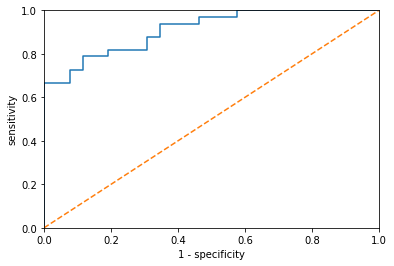

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
print("AUC score:", roc_auc_score(y_test, y_pred_proba[:, 1]))

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.show()

Instead of just splitting the dataset into 80-20 split we can even use K fold validation in which we split the dataset into n splits which is further split into 80-20 splits. We can then build a model on each split and check the score of each n models.

Accuracy : 0.8028638223261252
Precision: 0.8253478609675554
Recall   : 0.7899902248289346
Accuracy : 0.8006874378280033

AUC score: 0.9125874125874127


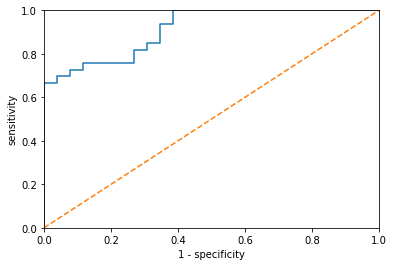

AUC score: 0.9195804195804196


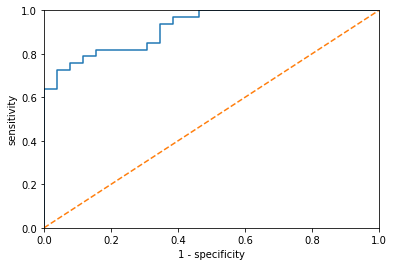

AUC score: 0.914918414918415


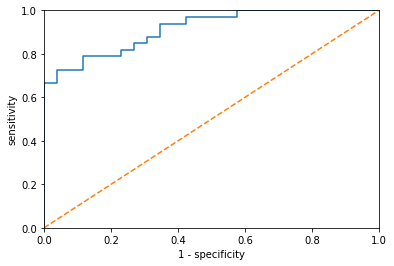

AUC score: 0.9195804195804196


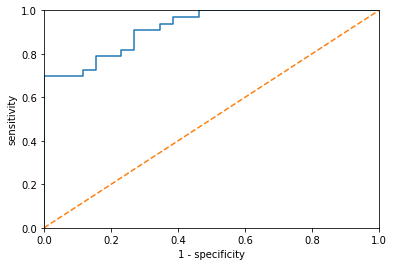

AUC score: 0.9207459207459208


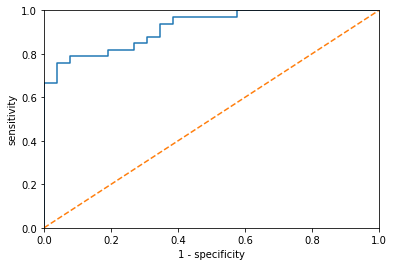

In [ ]:
from sklearn.model_selection import KFold
import numpy as  np
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def score_model(X,y,kf1):
    acc_score = []
    pre_score = []
    rec_score = []
    f_score = []
    models = []
    for train_indices, test_indices in kf1.split(X):
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
        model = LogisticRegression(solver='liblinear')
        model.fit(X_train,y_train)
        models.append(model)
        y_pred = model.predict(X_test)
        acc_score.append(accuracy_score(y_test,y_pred))
        pre_score.append(precision_score(y_test,y_pred))
        rec_score.append(recall_score(y_test,y_pred))
        f_score.append(f1_score(y_test,y_pred))
    print("Accuracy : " + str(np.mean(acc_score)))
    print("Precision: " + str(np.mean(pre_score)))
    print("Recall   : " + str(np.mean(rec_score)))
    print("Accuracy : " + str(np.mean(f_score)) + "\n")
    return models

kf = KFold(n_splits = 5, shuffle = True)

models = score_model(X_features, Y_labels, kf)

for model in models:
    y_pred_proba = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
    print("AUC score:", roc_auc_score(y_test, y_pred_proba[:, 1]))
    
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('1 - specificity')
    plt.ylabel('sensitivity')
    plt.show()

Test the each model on the train set in order to verify.

In [ ]:
model_num = 1
for model in models:
  print("\nModel " + str(model_num) + ":")
  y_pred_proba = model.predict_proba(X_test)
  print("AUC score:", roc_auc_score(y_test, y_pred_proba[:, 1]))
  print("Accuracy:", accuracy_score(y_test,y_pred_proba[:, 1] > 0.75))
  print("Precision:", precision_score(y_test,y_pred_proba[:, 1] > 0.75))
  print("Recall:", recall_score(y_test,y_pred_proba[:, 1] > 0.75))
  print("F1 score:", f1_score(y_test,y_pred_proba[:, 1] > 0.75))
  model_num += 1


Model 1:
AUC score: 0.9125874125874127
Accuracy: 0.7457627118644068
Precision: 1.0
Recall: 0.5454545454545454
F1 score: 0.7058823529411764

Model 2:
AUC score: 0.9195804195804196
Accuracy: 0.7796610169491526
Precision: 1.0
Recall: 0.6060606060606061
F1 score: 0.7547169811320755

Model 3:
AUC score: 0.914918414918415
Accuracy: 0.7796610169491526
Precision: 1.0
Recall: 0.6060606060606061
F1 score: 0.7547169811320755

Model 4:
AUC score: 0.9195804195804196
Accuracy: 0.7627118644067796
Precision: 1.0
Recall: 0.5757575757575758
F1 score: 0.7307692307692308

Model 5:
AUC score: 0.9207459207459208
Accuracy: 0.7796610169491526
Precision: 1.0
Recall: 0.6060606060606061
F1 score: 0.7547169811320755


# Random Forest Classifier

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(precision_score(y_test, y_pred))

y_pred1 = model.predict_proba(X_test)[:,1] > 0.75
print(precision_score(y_test,y_pred1))

0.9142857142857143
0.9583333333333334


AUC score: 0.974941724941725


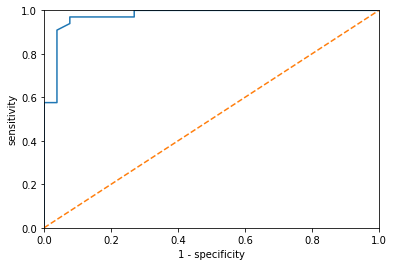

In [ ]:
from sklearn.metrics import roc_curve

y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
print("AUC score:", roc_auc_score(y_test, y_pred_proba[:, 1]))

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.show()

Accuracy : 0.8163062536528345
Precision: 0.8402688339010218
Recall   : 0.7909846475363717
Accuracy : 0.8120246966148604

AUC score: 0.9254079254079254


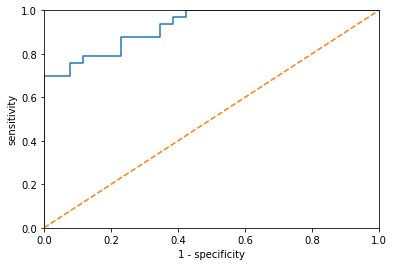

AUC score: 0.9230769230769231


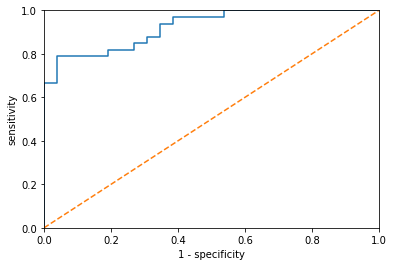

AUC score: 0.9172494172494172


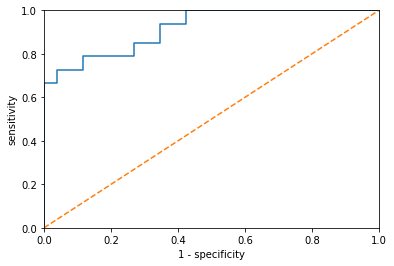

AUC score: 0.916083916083916


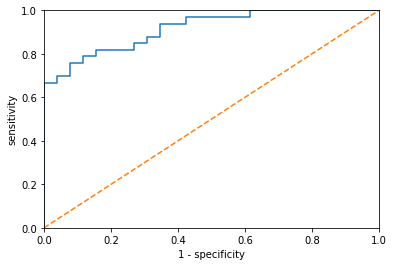

AUC score: 0.916083916083916


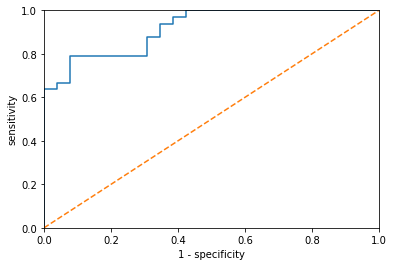

In [ ]:
from sklearn.model_selection import KFold
import numpy as  np
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def score_model(X,y,kf1):
    acc_score = []
    pre_score = []
    rec_score = []
    f_score = []
    models = []
    for train_indices, test_indices in kf1.split(X):
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
        model = LogisticRegression(solver='liblinear')
        model.fit(X_train,y_train)
        models.append(model)
        y_pred = model.predict(X_test)
        acc_score.append(accuracy_score(y_test,y_pred))
        pre_score.append(precision_score(y_test,y_pred))
        rec_score.append(recall_score(y_test,y_pred))
        f_score.append(f1_score(y_test,y_pred))
    print("Accuracy : " + str(np.mean(acc_score)))
    print("Precision: " + str(np.mean(pre_score)))
    print("Recall   : " + str(np.mean(rec_score)))
    print("Accuracy : " + str(np.mean(f_score)) + "\n")
    return models

kf = KFold(n_splits = 5, shuffle = True)

models = score_model(X_features, Y_labels, kf)

for model in models:
    y_pred_proba = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
    print("AUC score:", roc_auc_score(y_test, y_pred_proba[:, 1]))
    
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('1 - specificity')
    plt.ylabel('sensitivity')
    plt.show()

In [ ]:
model_num = 1
for model in models:
  print("\nModel " + str(model_num) + ":")
  y_pred_proba = model.predict_proba(X_test)
  print("AUC score:", roc_auc_score(y_test, y_pred_proba[:, 1]))
  print("Accuracy:", accuracy_score(y_test,y_pred_proba[:, 1] > 0.75))
  print("Precision:", precision_score(y_test,y_pred_proba[:, 1] > 0.75))
  print("Recall:", recall_score(y_test,y_pred_proba[:, 1] > 0.75))
  print("F1 score:", f1_score(y_test,y_pred_proba[:, 1] > 0.75))
  model_num += 1


Model 1:
AUC score: 0.9254079254079254
Accuracy: 0.7796610169491526
Precision: 1.0
Recall: 0.6060606060606061
F1 score: 0.7547169811320755

Model 2:
AUC score: 0.9230769230769231
Accuracy: 0.7627118644067796
Precision: 1.0
Recall: 0.5757575757575758
F1 score: 0.7307692307692308

Model 3:
AUC score: 0.9172494172494172
Accuracy: 0.7627118644067796
Precision: 1.0
Recall: 0.5757575757575758
F1 score: 0.7307692307692308

Model 4:
AUC score: 0.916083916083916
Accuracy: 0.7796610169491526
Precision: 1.0
Recall: 0.6060606060606061
F1 score: 0.7547169811320755

Model 5:
AUC score: 0.916083916083916
Accuracy: 0.7966101694915254
Precision: 1.0
Recall: 0.6363636363636364
F1 score: 0.7777777777777778


# Naive Bayes Classifier

In [ ]:
model = Naive_Bayes()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(precision_score(y_test, y_pred))

y_pred1 = model.predict_proba(X_test)[:,1] > 0.75
print(precision_score(y_test,y_pred1))

0.8260869565217391
0.8260869565217391


AUC score: 0.8216783216783217


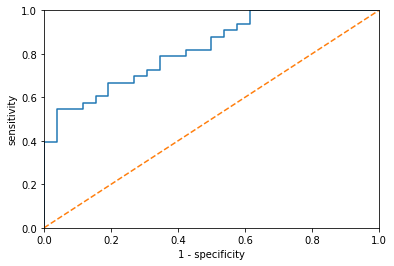

In [ ]:
from sklearn.metrics import roc_curve

y_pred_proba = model.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
print("AUC score:", roc_auc_score(y_test, y_pred_proba[:, 1]))

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('1 - specificity')
plt.ylabel('sensitivity')
plt.show()

Accuracy : 0.8029222676797195
Precision: 0.8315292712066904
Recall   : 0.7764371935895852
Accuracy : 0.7961768071960569

AUC score: 0.9137529137529138


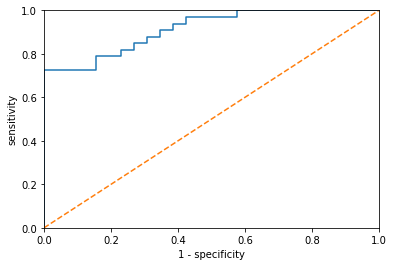

AUC score: 0.9184149184149184


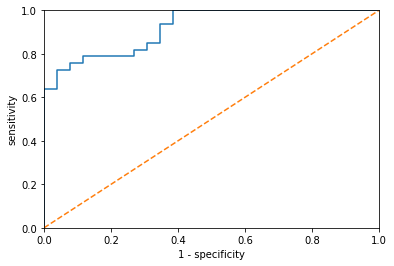

AUC score: 0.921911421911422


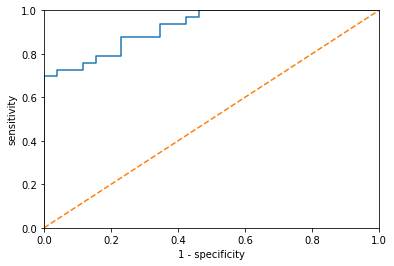

AUC score: 0.9230769230769231


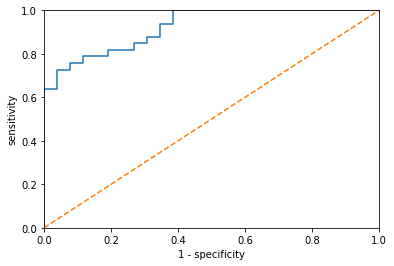

AUC score: 0.914918414918415


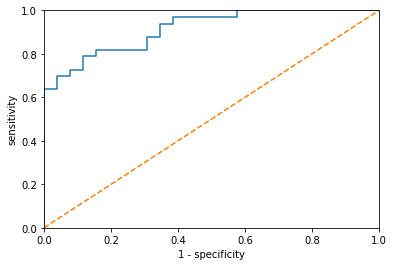

In [ ]:
from sklearn.model_selection import KFold
import numpy as  np
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def score_model(X,y,kf1):
    acc_score = []
    pre_score = []
    rec_score = []
    f_score = []
    models = []
    for train_indices, test_indices in kf1.split(X):
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
        model = LogisticRegression(solver='liblinear')
        model.fit(X_train,y_train)
        models.append(model)
        y_pred = model.predict(X_test)
        acc_score.append(accuracy_score(y_test,y_pred))
        pre_score.append(precision_score(y_test,y_pred))
        rec_score.append(recall_score(y_test,y_pred))
        f_score.append(f1_score(y_test,y_pred))
    print("Accuracy : " + str(np.mean(acc_score)))
    print("Precision: " + str(np.mean(pre_score)))
    print("Recall   : " + str(np.mean(rec_score)))
    print("Accuracy : " + str(np.mean(f_score)) + "\n")
    return models

kf = KFold(n_splits = 5, shuffle = True)

models = score_model(X_features, Y_labels, kf)

for model in models:
    y_pred_proba = model.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
    print("AUC score:", roc_auc_score(y_test, y_pred_proba[:, 1]))
    
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('1 - specificity')
    plt.ylabel('sensitivity')
    plt.show()

In [ ]:
model_num = 1
for model in models:
  print("\nModel " + str(model_num) + ":")
  y_pred_proba = model.predict_proba(X_test)
  print("AUC score:", roc_auc_score(y_test, y_pred_proba[:, 1]))
  print("Accuracy:", accuracy_score(y_test,y_pred_proba[:, 1] > 0.75))
  print("Precision:", precision_score(y_test,y_pred_proba[:, 1] > 0.75))
  print("Recall:", recall_score(y_test,y_pred_proba[:, 1] > 0.75))
  print("F1 score:", f1_score(y_test,y_pred_proba[:, 1] > 0.75))
  model_num += 1


Model 1:
AUC score: 0.9137529137529138
Accuracy: 0.7288135593220338
Precision: 1.0
Recall: 0.5151515151515151
F1 score: 0.6799999999999999

Model 2:
AUC score: 0.9184149184149184
Accuracy: 0.7796610169491526
Precision: 1.0
Recall: 0.6060606060606061
F1 score: 0.7547169811320755

Model 3:
AUC score: 0.921911421911422
Accuracy: 0.7796610169491526
Precision: 1.0
Recall: 0.6060606060606061
F1 score: 0.7547169811320755

Model 4:
AUC score: 0.9230769230769231
Accuracy: 0.7966101694915254
Precision: 1.0
Recall: 0.6363636363636364
F1 score: 0.7777777777777778

Model 5:
AUC score: 0.914918414918415
Accuracy: 0.7627118644067796
Precision: 1.0
Recall: 0.5757575757575758
F1 score: 0.7307692307692308


In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predRF = rfc.predict(X_test)

print(classification_report(y_test, predRF))

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        26
           1       0.88      0.91      0.90        33

    accuracy                           0.88        59
   macro avg       0.88      0.88      0.88        59
weighted avg       0.88      0.88      0.88        59



In [ ]:
param_grid = { 
     'n_estimators': range(100,300,25),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' :range(1,10),
    'random_state':range(100,250,50),
    'criterion' :['gini', 'entropy']
}
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

In [ ]:
CV_rfc.best_params_

In [ ]:
rfc1=RandomForestClassifier(random_state=200, max_features='auto', n_estimators= 125, max_depth=7, criterion='entropy')
rfc1.fit(X_train, y_train)
predRFC = rfc1.predict(X_test)
print(classification_report(y_test, predRFC))

In [ ]:
plot_confusion_matrix(rfc1, X_test, y_test, cmap=plt.cm.Blues) 
plt.title('Confusion matrix for Random Forest', y=1.1)
plt.show()

In [ ]:
# Naive Bayes

gnb = Naive_Bayes()
gnb.fit(X_train, y_train)
predgnb = gnb.predict(X_test)

print(classification_report(y_test, predgnb))

In [ ]:
print("Confusion Matrix:")
confusion_matrix(y_test, predgnb)

In [ ]:
# scores -check how efficiently labels are predicted
accuracy_testing = accuracy_score(y_test, predgnb)
print("Accuracy % :",accuracy_testing*100)

In [ ]:
plot_confusion_matrix(gnb, X_test, y_test, cmap=plt.cm.Blues) 
plt.title('Confusion matrix for Naive Byes', y=1.1)
plt.show()

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
predDT = clf.predict(X_test)

print(classification_report(y_test, predDT))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90        26
           1       0.89      0.97      0.93        33

    accuracy                           0.92        59
   macro avg       0.92      0.91      0.91        59
weighted avg       0.92      0.92      0.91        59



In [ ]:
param_grid = { 
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' :range(1,10),
    'random_state':range(30,210,30),
    'criterion' :['gini', 'entropy']
}
CV_dt = GridSearchCV(estimator=clf, param_grid=param_grid, cv= 5)
CV_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': range(30, 210, 30)})

In [ ]:
CV_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'random_state': 90}

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image
import cv2
from google.colab.patches import cv2_imshow

dt1=DecisionTreeClassifier(random_state=120, max_features='auto', max_depth=6, criterion='entropy')
dt1.fit(X_train, y_train)
predDT = dt1.predict(X_test) 
print(classification_report(y_test, predDT))

# feature_names = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
#        'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
#        'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
#        'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
#        'spread1', 'spread2', 'D2', 'PPE']

dot_file = export_graphviz(dt1)
graph = graphviz.Source(dot_file)
graph.render(filename='tree', format='png', cleanup=True)

              precision    recall  f1-score   support

           0       0.79      0.85      0.81        26
           1       0.87      0.82      0.84        33

    accuracy                           0.83        59
   macro avg       0.83      0.83      0.83        59
weighted avg       0.83      0.83      0.83        59



'tree.png'

In [ ]:
plot_confusion_matrix(dt1, X_test, y_test, cmap=plt.cm.Blues) 
plt.title('Confusion matrix for Decision Tree', y=1.1)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score
import numpy as np

df = pd.read_csv('https://sololearn.com/uploads/files/titanic.csv')
df['male'] = df['Sex'] == 'male'
X = df[['Pclass', 'male', 'Age', 'Siblings/Spouses', 'Parents/Children', 'Fare']].values
y = df['Survived'].values

kf = KFold(n_splits = 5, shuffle = True)

for criterion in ['gini','entropy']:
    print("Decision tree: " + criterion)
    accuracy = []
    precision = []
    recall = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        dt  = DecisionTreeClassifier(criterion = criterion)
        dt.fit(X_train, y_train)
        y_pred = dt.predict(X_test)
        accuracy.append(accuracy_score(y_test,y_pred))
        precision.append(precision_score(y_test,y_pred))
        recall.append(recall_score(y_test,y_pred))
    print("Accuracy: " + str(np.mean(accuracy)))
    print("Precision: " + str(np.mean(precision)))
    print("Recall: " + str(np.mean(recall)))
    print("")
    

In [ ]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image
import cv2
from google.colab.patches import cv2_imshow

feature_names = ['Pclass', 'male']
X = df[feature_names].values
y = df['Survived'].values

dt = DecisionTreeClassifier()
dt.fit(X, y)

dot_file = export_graphviz(dt, feature_names=feature_names)
graph = graphviz.Source(dot_file)
graph.render(filename='tree', format='png', cleanup=True)